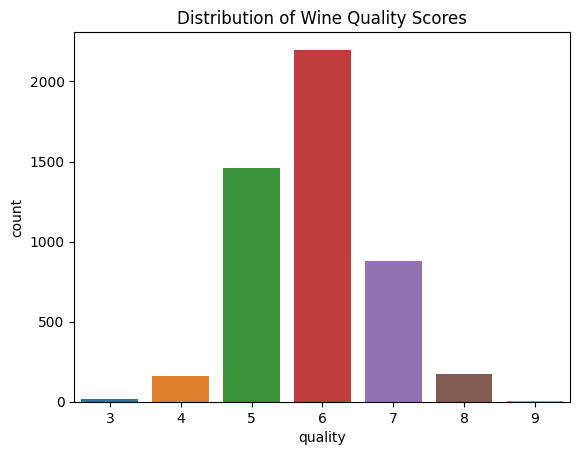

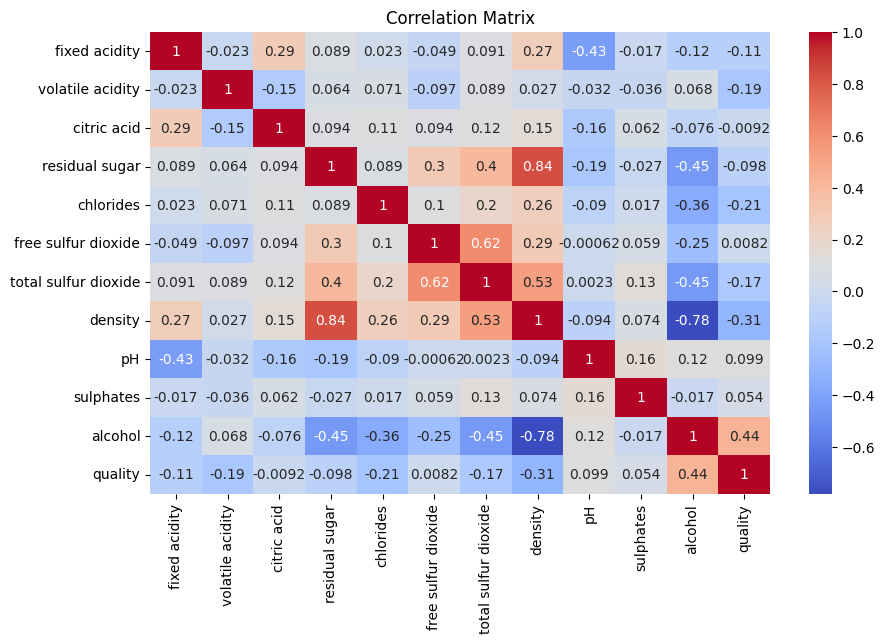

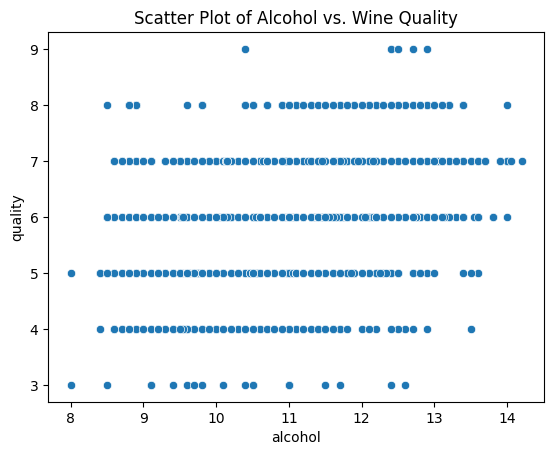

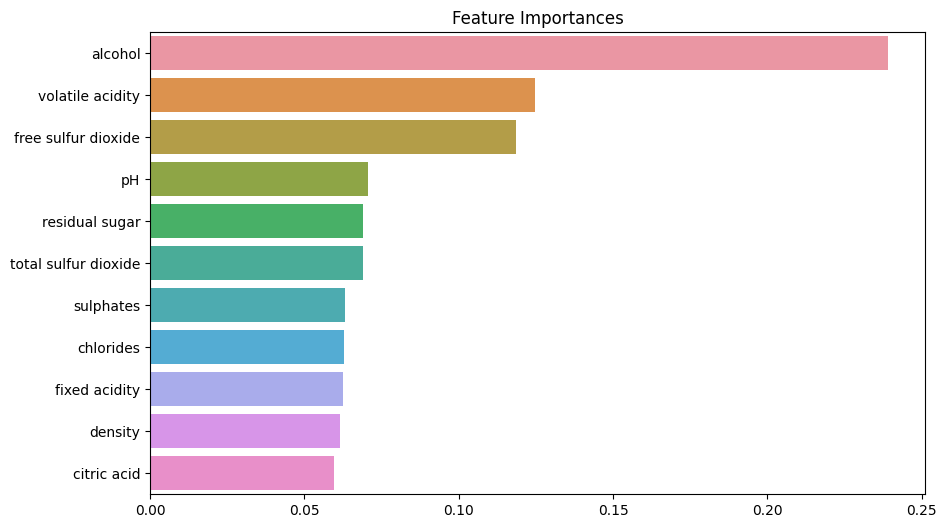

Mean Squared Error on Test Set: 0.34775581632653063
Top factors that influence wine quality:
alcohol: 0.2391
volatile acidity: 0.1247
free sulfur dioxide: 0.1185
pH: 0.0706
residual sugar: 0.0690


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

missing_values = wine_data.isnull().sum()


sns.countplot(x='quality', data=wine_data)
plt.title("Distribution of Wine Quality Scores")
plt.show()

corr_matrix = wine_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


sns.scatterplot(x='alcohol', y='quality', data=wine_data)
plt.title("Scatter Plot of Alcohol vs. Wine Quality")
plt.show()

X = wine_data.drop(columns=['quality'])
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.show()

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

top_factors = feature_importances.index[:5]
print("Top factors that influence wine quality:")
for factor in top_factors:
    print(f"{factor}: {feature_importances[factor]:.4f}")
